In [29]:
%matplotlib inline
import pandas as pd
from numpy import arange
import geopandas
from shapely.geometry import Polygon
from ulmo.nasa import daymet

## North America
minLongitude = -131.0
maxLongitude = -53.0

minLatitude  = 14.0
maxLatitude  = 52.0

northAmericaBounds = [minLatitude, maxLatitude, minLongitude, maxLongitude]

# Cell spacing = 2x2 degrees.
cellsizeLon = 2
cellsizeLat = 2

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
northAmerica = world[world['continent'] == "North America"]





# 1. (obsolete, see below) Mapping degree-day accumulation per time period $\Delta t$. 

Here we create a grid of 2x2 cells.

In [30]:
startDate = "2010-01-01"
endDate   = "2010-12-31"

cells = []

for lat in arange(minLatitude, maxLatitude, cellsizeLat):
    for lon in arange(minLongitude, maxLongitude, cellsizeLon):
        cells.append(Polygon([(lon, lat),
                              (lon+cellsizeLon, lat),
                              (lon+cellsizeLon, lat+cellsizeLat),
                              (lon, lat+cellsizeLat)]))

geodata = geopandas.GeoDataFrame(geometry=cells)
geodata.crs = {'init': 'epsg:4326'} #wgs84 projection

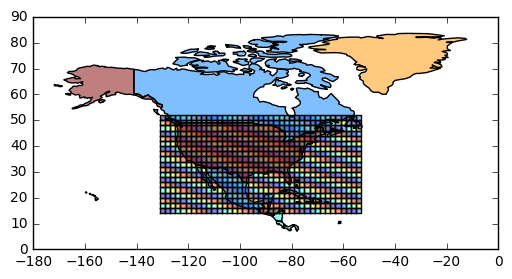

In [32]:
northAmerica.plot(ax=geodata.plot())


# A Better Strategy: begin from 